# 03. Визуализация построенных графов

---

Loading Co-Repo Graph...


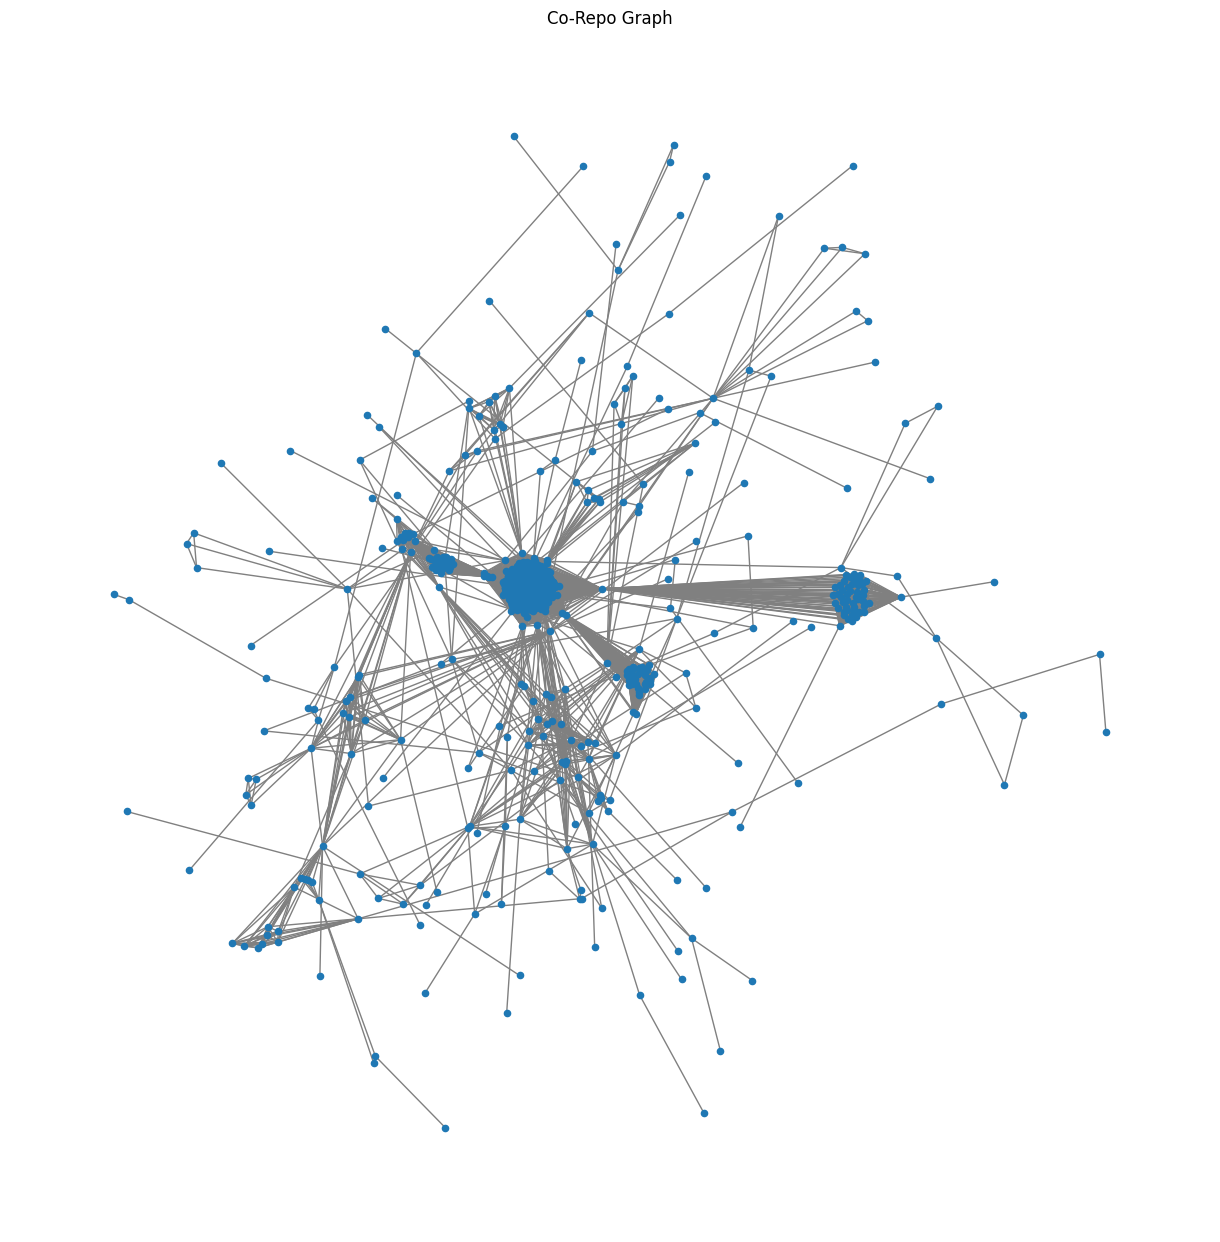

Loading Followers Graph...


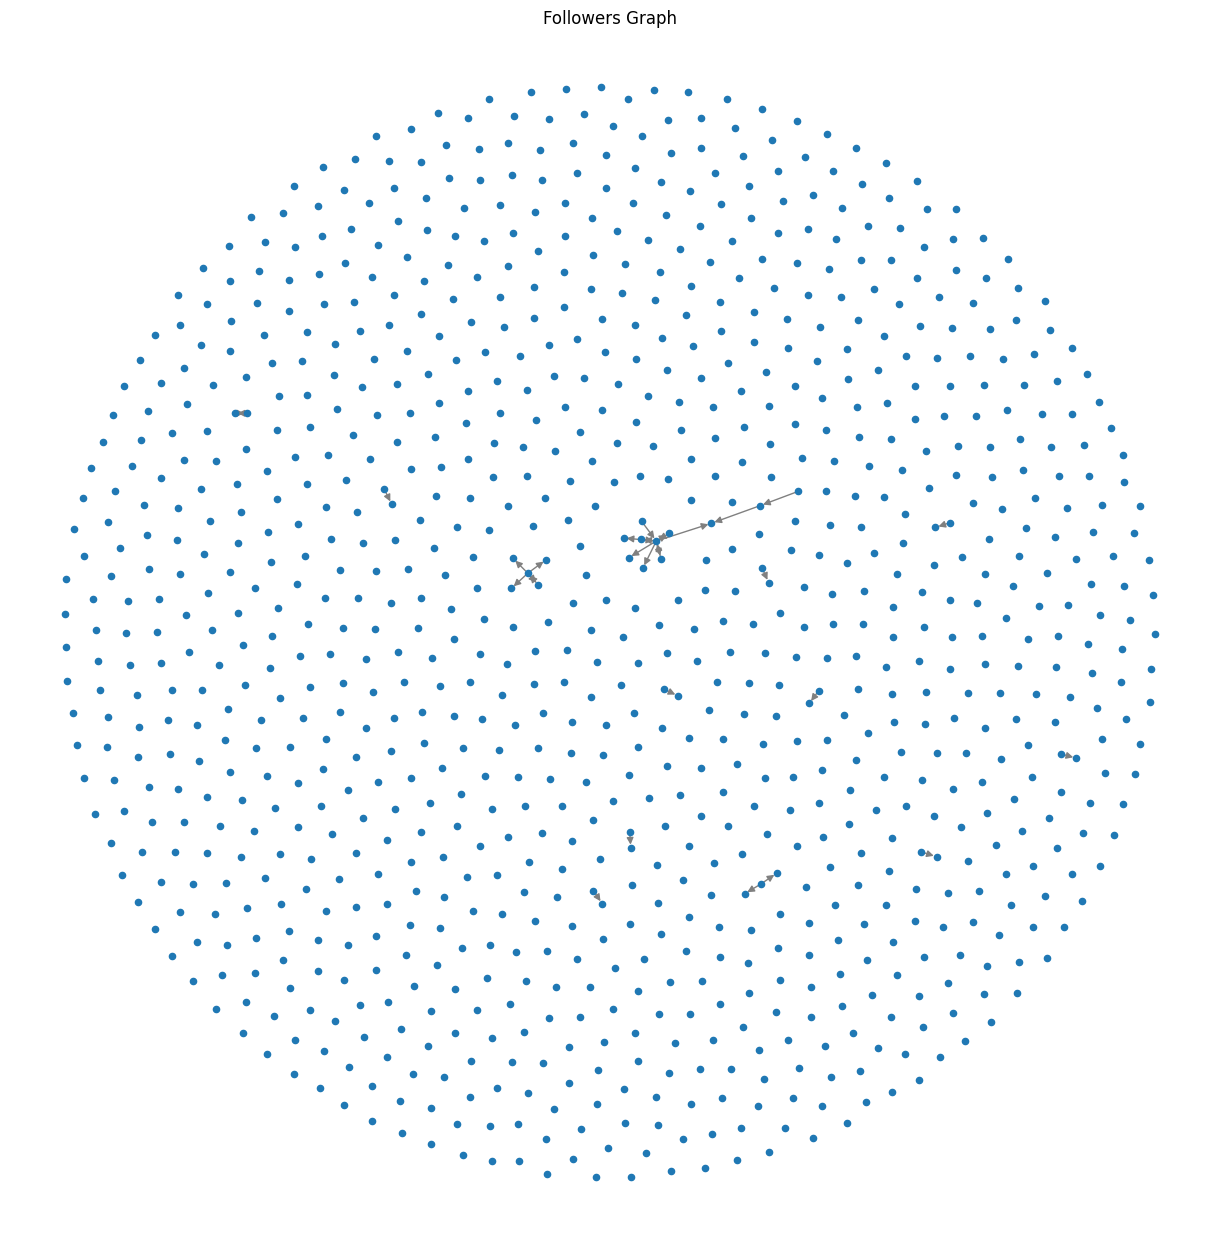

Loading Author-Committer Graph...


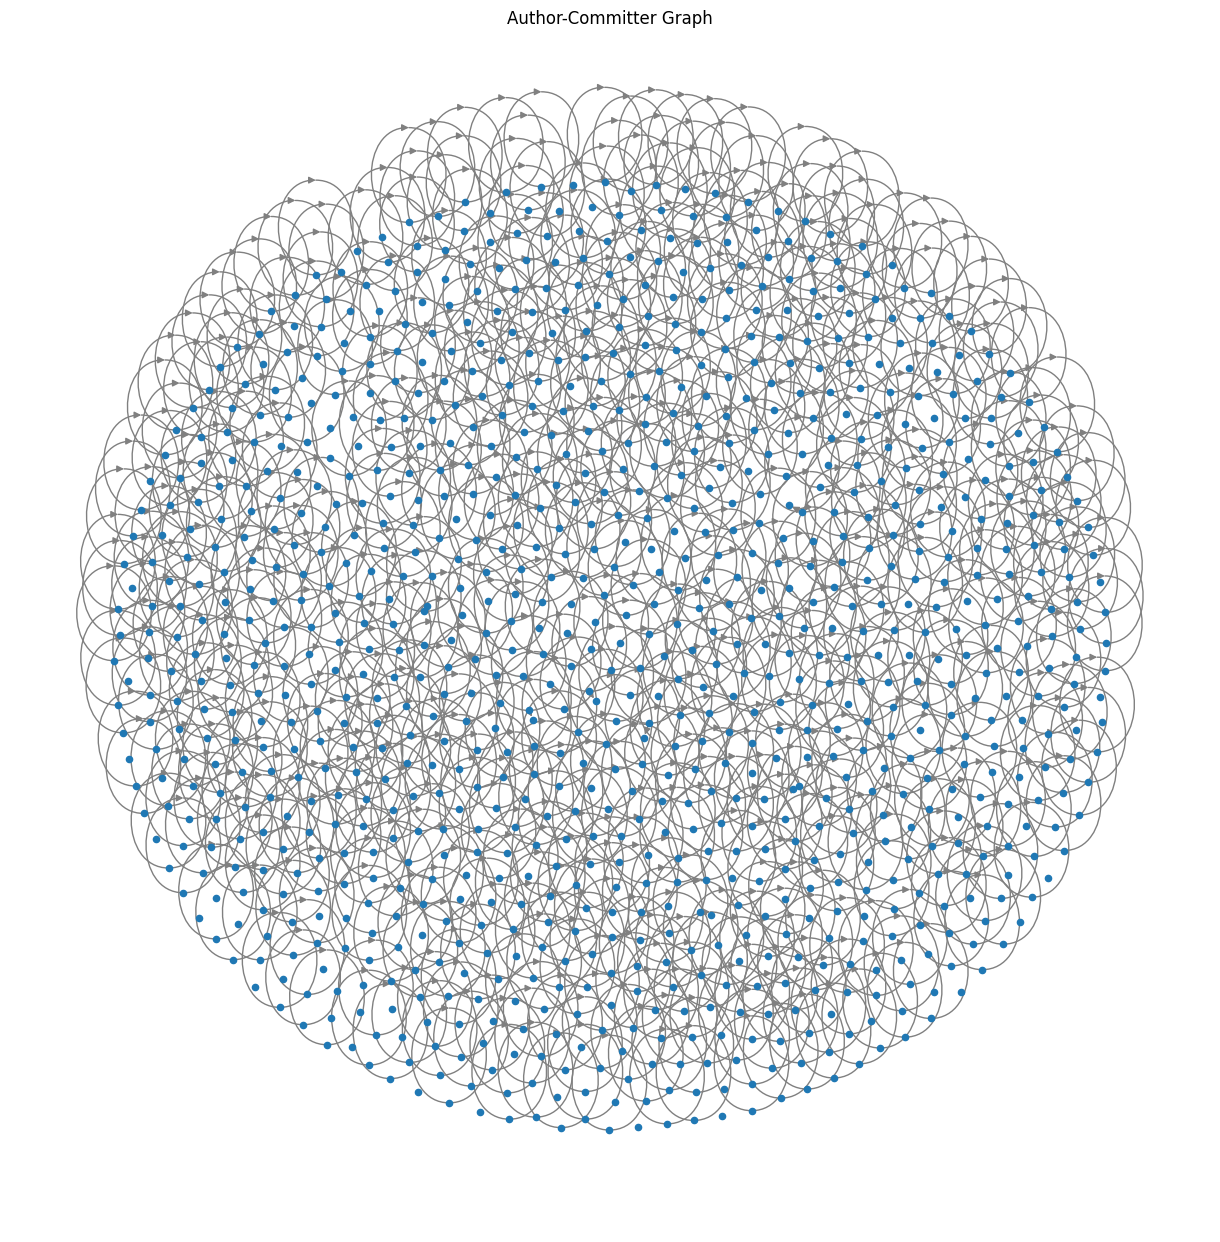

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

GRAPH_PATHS = [
    "/Users/georgetarasov/Desktop/NIR/github-roles-abm/data/graphs/co_repo_graph.graphml",
    "/Users/georgetarasov/Desktop/NIR/github-roles-abm/data/graphs/followers_graph.graphml",
    "/Users/georgetarasov/Desktop/NIR/github-roles-abm/data/graphs/author_committer_graph.graphml"
]

NAMES = ["Co-Repo Graph", "Followers Graph", "Author-Committer Graph"]

for path, name in zip(GRAPH_PATHS, NAMES):
    print(f"Loading {name}...")
    G = nx.read_graphml(path)

    # Если граф ориентированный, используем DiGraph
    if not nx.is_directed(G):
        largest_cc = max(nx.connected_components(G), key=len)
        H = G.subgraph(largest_cc).copy()
    else:
        # Для ориентированного графа берем крупнейший слабосвязный компонент
        largest_cc = max(nx.weakly_connected_components(G), key=len)
        H = G.subgraph(largest_cc).copy()

    # Ограничим число узлов до 1000 для наглядности
    if H.number_of_nodes() > 1000:
        nodes = random.sample(list(H.nodes()), 1000)
        H = H.subgraph(nodes).copy()

    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(H, seed=42)

    # Для ориентированных графов добавим стрелки
    if nx.is_directed(H):
        nx.draw(H, pos, node_size=20, edge_color="gray", arrows=True, arrowsize=10)
    else:
        nx.draw(H, pos, node_size=20, edge_color="gray")

    plt.title(name)
    plt.show()
